## Importing the libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

## Loading the dataset

In [64]:
df = pd.read_csv('../Datasets/train.csv')
df = df.iloc[:1776,3:]

## Augmented Dickey Fuller test for finding out whether the dataset is stationary or not

In [65]:
# Perform the ADF test
result = adfuller(df['sales'])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Compare the p-value to a significance level (e.g., 0.05) for the inference
if p_value <= 0.05:
    print("Reject the null hypothesis: Data is stationary.")
else:
    print("Fail to reject the null hypothesis: Data is non-stationary.")


ADF Statistic: -3.0955157537918767
p-value: 0.026886827512722755
Reject the null hypothesis: Data is stationary.


## The Autocorrelation plot 

<Figure size 1200x600 with 0 Axes>

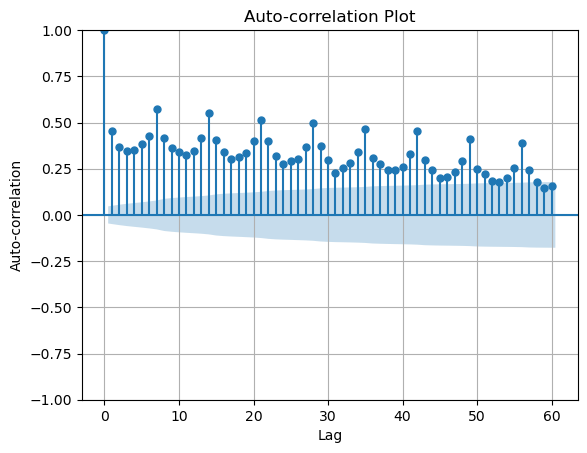

In [66]:
# Calculate and plot auto-correlation
plt.figure(figsize=(12, 6))
plot_acf(df['sales'], lags=60) 
plt.title('Auto-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Auto-correlation')
plt.grid(True)
plt.show()


inference :The auto correlation plot tells that there is a correlation between the lags since it has a positive correlation.Also the plot will help us find the q value(order of moving averages).This q value is calculated when the lag falls below the significance level.In this plot we can see that the q value is approximately 58

## The partial autocorrelation plot

<Figure size 1200x600 with 0 Axes>

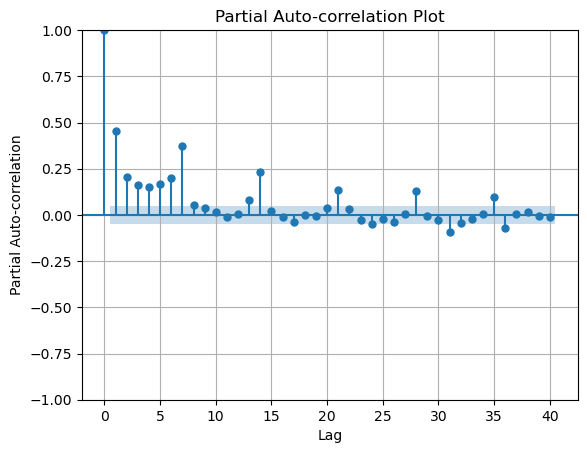

In [67]:
plt.figure(figsize=(12,6))
plot_pacf(df['sales'], lags=40)
plt.title('Partial Auto-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Auto-correlation')
plt.grid(True)
plt.show()

Next we will draw a plot with a lag of 10 units so that we will be able to exactly observe where the correlation value falls below the significance/confidence level

<Figure size 1200x600 with 0 Axes>

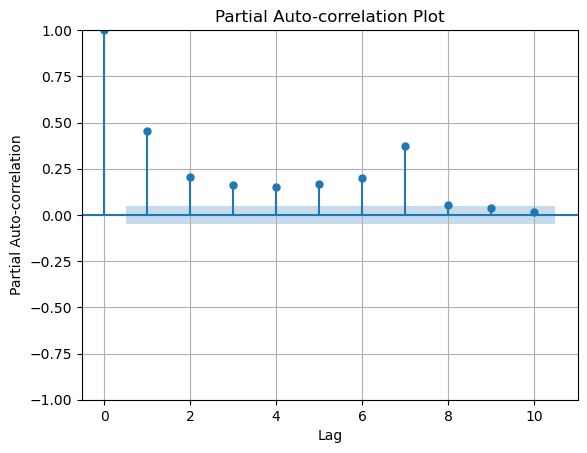

In [68]:
plt.figure(figsize=(12,6))
plot_pacf(df['sales'], lags=10)
plt.title('Partial Auto-correlation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Auto-correlation')
plt.grid(True)
plt.show()

Inference: The partial auto-correlation function plot is used to find the p - value(the autoregressive component).The value after which the spike drops
below the significant level is generally considered to be the p - value.  

## Using mean and variance to check if the dataset is stationary or not

In [69]:
X = df.values

In [70]:
split = int(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()

In [71]:
mean1 

17.820945945945947

In [72]:
mean2

22.153153153153152

In [73]:
var1

35.14023694302411

In [74]:
var2

46.61618375131889

## ARIMA model

In [75]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
model = ARIMA(df,order=(8,0,58))
model_fit = model.fit()

/Users/surya/anaconda3/envs/tf/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [77]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1776
Model:                ARIMA(8, 0, 58)   Log Likelihood               -5245.385
Date:                Wed, 01 Nov 2023   AIC                          10626.769
Time:                        01:19:58   BIC                          10999.553
Sample:                             0   HQIC                         10764.472
                               - 1776                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9743      1.651     12.095      0.000      16.737      23.211
ar.L1          0.6138      0.422      1.453      0.146      -0.214       1.441
ar.L2         -0.0179      0.011     -1.628      0.1

In [78]:
forecast_steps = 50  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

In [79]:
forecast

1776    22.832613
1777    17.848844
1778    19.797100
1779    16.092322
1780    20.254778
1781    21.204506
1782    25.662449
1783    22.391302
1784    16.796084
1785    19.667071
1786    18.518742
1787    21.874660
1788    20.565598
1789    25.264823
1790    23.482319
1791    17.289015
1792    19.159959
1793    16.946823
1794    20.081609
1795    20.159985
1796    26.443822
1797    23.216918
1798    16.362404
1799    18.008277
1800    17.765321
1801    21.565707
1802    19.762844
1803    25.669199
1804    22.955372
1805    17.376590
1806    18.719278
1807    16.508542
1808    20.983873
1809    20.606262
1810    26.409651
1811    23.290432
1812    16.758067
1813    18.058748
1814    17.053855
1815    21.541567
1816    20.531068
1817    26.086353
1818    22.721069
1819    17.097700
1820    18.448113
1821    17.517979
1822    21.859438
1823    20.933154
1824    25.908332
1825    22.610229
Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'standalone plot of the forecasted data')

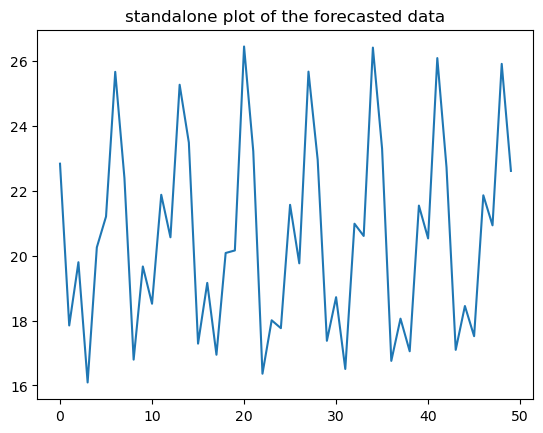

In [80]:
x = [i for i in range(50)]
plt.plot(x,forecast)
plt.title("standalone plot of the forecasted data")

In [81]:
# obtaining the original data for the plot
hf = pd.read_csv('../Datasets/train.csv')
hf = hf.iloc[1776:1826,3:].values

In [82]:
hf

array([[27],
       [22],
       [16],
       [19],
       [22],
       [25],
       [31],
       [32],
       [21],
       [29],
       [27],
       [25],
       [22],
       [29],
       [24],
       [10],
       [14],
       [28],
       [15],
       [19],
       [16],
       [31],
       [ 7],
       [20],
       [17],
       [18],
       [17],
       [27],
       [20],
       [20],
       [13],
       [17],
       [14],
       [16],
       [15],
       [22],
       [19],
       [ 7],
       [16],
       [12],
       [ 6],
       [18],
       [19],
       [13],
       [16],
       [14],
       [19],
       [15],
       [27],
       [23]])

Text(0.5, 1.0, 'Standalone plot of the original data')

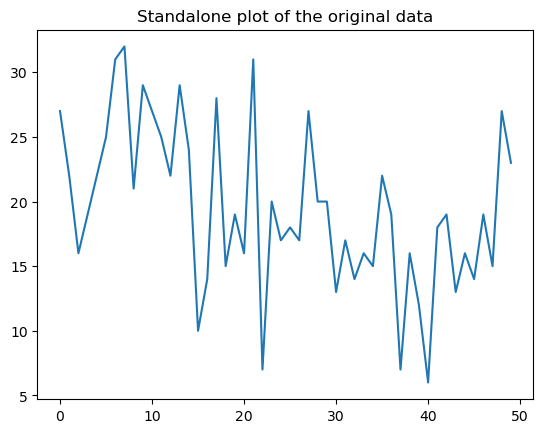

In [86]:
plt.plot(hf)
plt.title("Standalone plot of the original data")

In [83]:
# converting the series to a numpy array
f = forecast.values
f

array([22.83261308, 17.84884377, 19.79710008, 16.09232247, 20.25477798,
       21.20450554, 25.66244854, 22.39130223, 16.79608363, 19.66707128,
       18.51874207, 21.87465989, 20.56559843, 25.26482269, 23.48231909,
       17.28901528, 19.1599589 , 16.94682289, 20.08160894, 20.1599849 ,
       26.44382162, 23.21691795, 16.36240435, 18.00827681, 17.76532066,
       21.56570673, 19.76284366, 25.66919923, 22.9553722 , 17.37659026,
       18.71927833, 16.50854184, 20.98387302, 20.60626183, 26.40965082,
       23.2904321 , 16.75806749, 18.0587483 , 17.0538548 , 21.54156672,
       20.53106799, 26.08635342, 22.72106883, 17.09769997, 18.44811298,
       17.51797876, 21.85943847, 20.93315428, 25.90833239, 22.61022901])

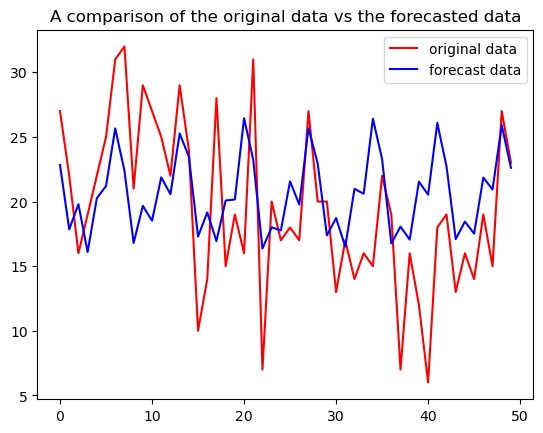

In [87]:
plt.plot(hf,color='red',label = 'original data')
plt.plot(f,color='blue',label = 'forecast data')
plt.legend()
plt.title("A comparison of the original data vs the forecasted data")
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(hf,f)
mse

35.03429591186625